In [1]:
import numpy as np
import Mors as mors
import matplotlib.pyplot as plt
import os
import scipy.integrate as integrate

In [5]:
star = mors.Load('p05_stars/p05_m0.1.pickle')

In [3]:
def massLossRate(efficiency, M_pl, R_pl):
    #efficiency between 0-1
    #M_pl in fraction of earth
    #R_pl in fraction of earth

    #need to get M_pl in actual mass
    Mp = M_pl * 5.97E24 #kg


    #same for R_pl
    Rp = R_pl * 6.37E6 #m

    #need flux over course of time for each case of rotator
    p10 = mors.Load('p10_stars/p10_m1.0204081632653061.pickle')
    p50 = mors.Load('p50_stars/p50_m1.0204081632653061.pickle')
    p90 = mors.Load('p90_stars/p90_m1.0204081632653061.pickle')

    #need age range
    t = np.linspace(10,5000,10000)

    '''
    #FxHZ in erg/s/cm^2
    #FeuvHZ is in the same units if I work with that instead
    p10_FxHZ = np.empty(len(t))
    p50_FxHZ = np.empty(len(t))
    p90_FxHZ = np.empty(len(t))

    p10_FeuvHZ = np.empty(len(t))
    p50_FeuvHZ = np.empty(len(t))
    p90_FeuvHZ = np.empty(len(t))
    
    
    for i,age in enumerate(t):
        p10_FxHZ[i] = p10.Value(Age = age, Quantity='FxHZ')
        p10_FeuvHZ[i] = p10.Value(Age = age, Quantity='FeuvHZ')
        
        p50_FxHZ[i] = p50.Value(Age = age, Quantity = 'FxHZ')
        p50_FeuvHZ[i] = p50.Value(Age = age, Quantity='FeuvHZ')
        
        p90_FxHZ[i] = p90.Value(Age = age, Quantity = 'FxHZ')
        p90_FeuvHZ[i] = p50.Value(Age = age, Quantity='FeuvHZ')

    p10_Ftot = p10_FxHZ + p10_FeuvHZ
    p50_Ftot = p50_FxHZ + p50_FeuvHZ
    p90_Ftot = p90_FxHZ + p90_FeuvHZ
    '''

    p10_Lx = np.empty(len(t))
    p50_Lx = np.empty(len(t))
    p90_Lx = np.empty(len(t))
    p10_Leuv = np.empty(len(t))
    p50_Leuv = np.empty(len(t))
    p90_Leuv = np.empty(len(t))
    
    for i,age in enumerate(t):
        p10_Lx[i] = p10.Value(Age = age, Quantity='Lx')
        p10_Leuv[i] = p10.Value(Age = age, Quantity='Leuv')
        
        p50_Lx[i] = p50.Value(Age = age, Quantity = 'Lx')
        p50_Leuv[i] = p50.Value(Age = age, Quantity='Leuv')
        
        p90_Lx[i] = p90.Value(Age = age, Quantity = 'Lx')
        p90_Leuv[i] = p90.Value(Age = age, Quantity='Leuv')

    #now calculate flux at 1 AU
    #F=L/4pir^2
    r = 1.496E13
    
    p10_flux = (p10_Lx + p10_Leuv)/(4 * np.pi * r**2)
    p50_flux = (p50_Lx + p50_Leuv)/(4 * np.pi * r**2)
    p90_flux = (p90_Lx + p90_Leuv)/(4 * np.pi * r**2)
    
    #need radius of atmosphere
    R_atm = Rp*1.1 #meters

    #gravitational constant
    G = 6.67E-11 #si
    
    #Mdot is g/s
    #put all units into si then convert to g/s
    #p10_FxHZ = p10_FxHZ*10**-3 #erg/s/cm^2 * cm^2/10^-4 m^2 --> erg/s/10^-4 m^2 --> 10^-7 J/s^3/10^-4 m^2 --> 10^-3 kg/s^3, so just need to mult by 10^-3
    #p50_FxHZ = p50_FxHZ*10**-3
    #p90_FxHZ = p90_FxHZ*10**-3
    
    
    M_atm = 5E-3*Mp
    Mdot10 = np.pi*efficiency*p10_flux*R_atm**2*Rp/(G*Mp)   
    Mdot50 = np.pi*efficiency*p50_flux*R_atm**2*Rp/(G*Mp)  
    Mdot90 = np.pi*efficiency*p90_flux*R_atm**2*Rp/(G*Mp)
    
    '''
    Mdot10 = np.pi*efficiency*p10_Ftot*R_atm**2*Rp/(G*Mp) #*10**3  
    Mdot50 = np.pi*efficiency*p50_Ftot*R_atm**2*Rp/(G*Mp) #*10**3  
    Mdot90 = np.pi*efficiency*p90_Ftot*R_atm**2*Rp/(G*Mp) #*10**3  
    '''
    fig,ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].plot(t,Mdot10)
    ax[0].plot(t,Mdot50)
    ax[0].plot(t,Mdot90)
    ax[0].set_title('Mass loss rate vs time')
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_ylabel('Mass loss rate (grams/s)')
    ax[0].set_xlabel('Age(10Myr-9.2Gyr)')

    #want time in seconds, go from 100 Myr to 9.2 Gyr
    t0 = t*1E6*3.154E7
    #print(t0)
    #need to integrate
    
    
    #put Mdot in kg/year
    Mdot10_kg = Mdot10*1E-3*3.15E7
    Mdot50_kg = Mdot50*1E-3*3.15E7
    Mdot90_kg = Mdot90*1E-3*3.15E7

    #plot Mdot kg/year
    ax[2].plot(t,Mdot10_kg)
    ax[2].plot(t,Mdot50_kg)
    ax[2].plot(t,Mdot90_kg)
    ax[2].set_title('Mass loss rate vs time')
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_ylabel('Mass loss rate (kg/yr)')
    ax[2].set_xlabel('Age(10Myr-9.2Gyr)')
    
    M10 = (M_atm - integrate.cumtrapz(y=Mdot10_kg, x=t*1e6)) / M_atm *100
    M50 = (M_atm - integrate.cumtrapz(y=Mdot50_kg, x=t*1e6)) / M_atm *100
    M90 = (M_atm - integrate.cumtrapz(y=Mdot90_kg, x=t*1e6)) / M_atm *100
    #print(integrate.cumtrapz(y=Mdot10_kg, x=t0, initial=0))
    #print(M_atm - integrate.cumtrapz(y=Mdot10_kg, x=t0, initial=0))
    #print((M_atm-(integrate.trapezoid(y=Mdot10_kg, x=t*1e6)))/M_atm)
    print(M_atm/Mp)
    ax[1].plot(t[1:],M10)
    ax[1].plot(t[1:],M50)
    ax[1].plot(t[1:],M90)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_ylim([1,1E2])
    ax[1].set_title('%mass remaining over time')
    ax[1].set_xlabel('Age (10Myr-9.2Gyr)')
    ax[1].set_ylabel('% mass')

10000
10000
0.005


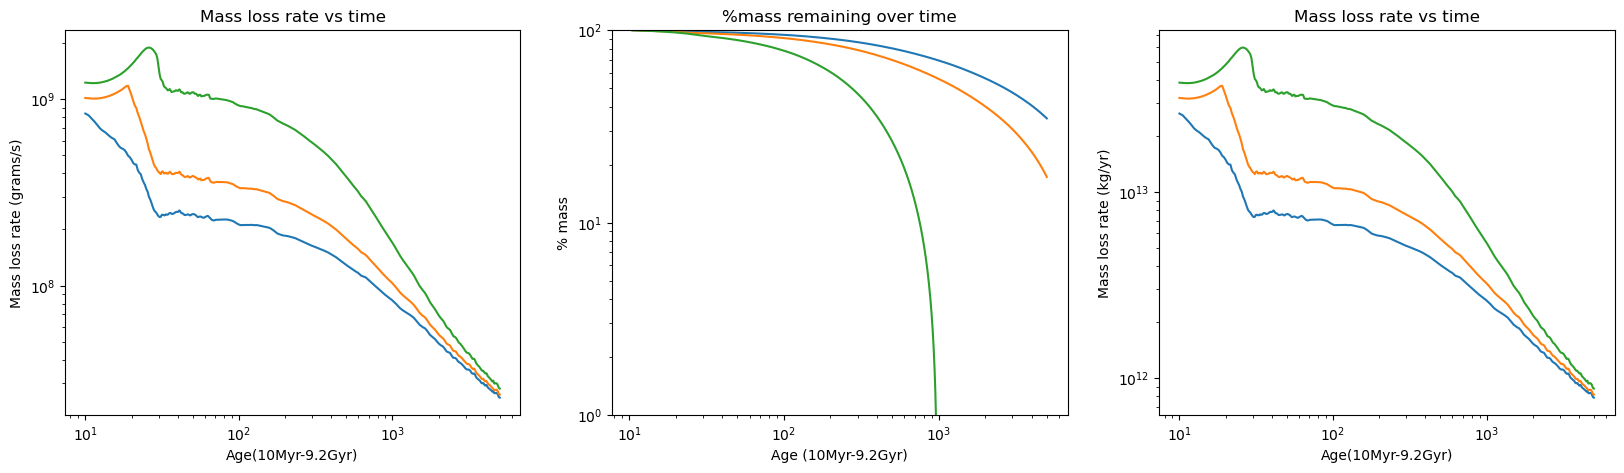

In [8]:
massLossRate(0.3,0.5,1)

In [159]:
def LxTrack():
    #efficiency between 0-1
    #M_pl in fraction of earth
    #R_pl in fraction of earth


    #need flux over course of time for each case of rotator
    p10 = mors.Load('p10_stars/p10_m1.0204081632653061.pickle')
    p50 = mors.Load('p50_stars/p50_m1.0204081632653061.pickle')
    p90 = mors.Load('p90_stars/p90_m1.0204081632653061.pickle')

    #need age range
    t = np.linspace(10,9200,10000)

    p10_Lx = np.empty(len(t))
    p50_Lx = np.empty(len(t))
    p90_Lx = np.empty(len(t))
    
    for i,age in enumerate(t):
        p10_Lx[i] = p10.Value(Age = age, Quantity='Lx')
        p50_Lx[i] = p50.Value(Age = age, Quantity = 'Lx')
        p90_Lx[i] = p90.Value(Age = age, Quantity = 'Lx')

    
    #plt.plot(t,Mdot05)
    #plt.plot(t,Mdot50)
    #plt.plot(t,Mdot95)
    #plt.title('Mass loss rate vs time')

    #make t0 = 10 so t=0 at 10
    t0 = np.linspace(10,9200,10000)
    #print(M05)
    plt.plot(t0,p10_Lx)
    plt.plot(t0,p50_Lx)
    plt.plot(t0,p90_Lx)
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Lx Tracks')
    plt.xlabel('Age (10Myr-9.2Gyr)')
    plt.ylabel('Lx (erg s-1)')
    #plt.ylim(10**27,10**31)
    

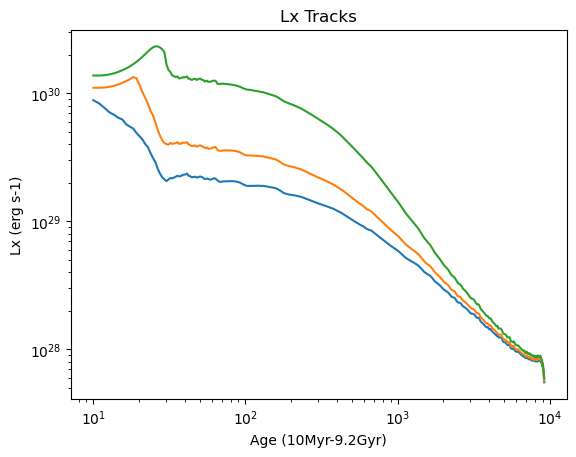

In [160]:
LxTrack()

In [67]:
mors.Star.PrintAvailableTracks?

Signature: mors.Star.PrintAvailableTracks(self)
Docstring: Prints all quantities that have evolutionary tracks available.
File:      ~/.local/lib/python3.11/site-packages/Mors/star.py
Type:      function
